<a href="https://colab.research.google.com/github/Chithra05/Supervised-Learning/blob/main/decision_tree_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df_dict={"passengerid":[1,2,3,4,5],
         "Survived":[0,1,1,1,0],
         "pclass":[3,1,3,1,3],
         "Name":["Harris","Bradley","Heikkinen","Jacques","William"],
         "Sex":["male","female","female","female","male"],
         "Age":[22.0,38.0,26.0,35.0,35.0],
         "SibSp":[1,1,0,1,0],
         "Parch":[0,0,0,0,0],
         "Ticket":[521171,17599,3101282,113803,373450],
         "Fare":[7.2500,71.2833,7.9250,53.1000,8.0500],
         "Cabin":["NaN",85,"NaN",123,"NaN"],
         "Embarked":['S','C','S','S','S']}

In [ ]:
df1=pd.DataFrame(df_dict)

In [ ]:
df1.columns

Index(['passengerid', 'Survived', 'pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df1.dtypes

passengerid      int64
Survived         int64
pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df1.head()

,passengerid,Survived,pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Harris,male,22.0,1,0,521171,7.2500,NaN,S
1,2,1,1,Bradley,female,38.0,1,0,17599,71.2833,85,C
2,3,1,3,Heikkinen,female,26.0,0,0,3101282,7.9250,NaN,S
3,4,1,1,Jacques,female,35.0,1,0,113803,53.1000,123,S
4,5,0,3,William,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1['Name'].value_counts()

Harris       1
Bradley      1
Heikkinen    1
Jacques      1
William      1
Name: Name, dtype: int64

In [ ]:
df1['Sex'].value_counts()

female    3
male      2
Name: Sex, dtype: int64

In [ ]:
df1['Age'].value_counts()

35.0    2
22.0    1
38.0    1
26.0    1
Name: Age, dtype: int64

In [ ]:
df1['Embarked'].value_counts()

S    4
C    1
Name: Embarked, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9aa8e65e90>]],
      dtype=object)

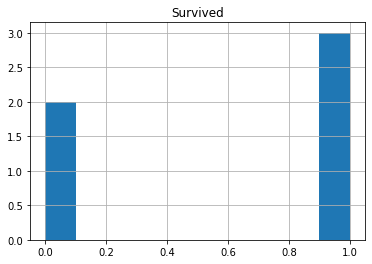

In [ ]:
df1.hist('Survived')

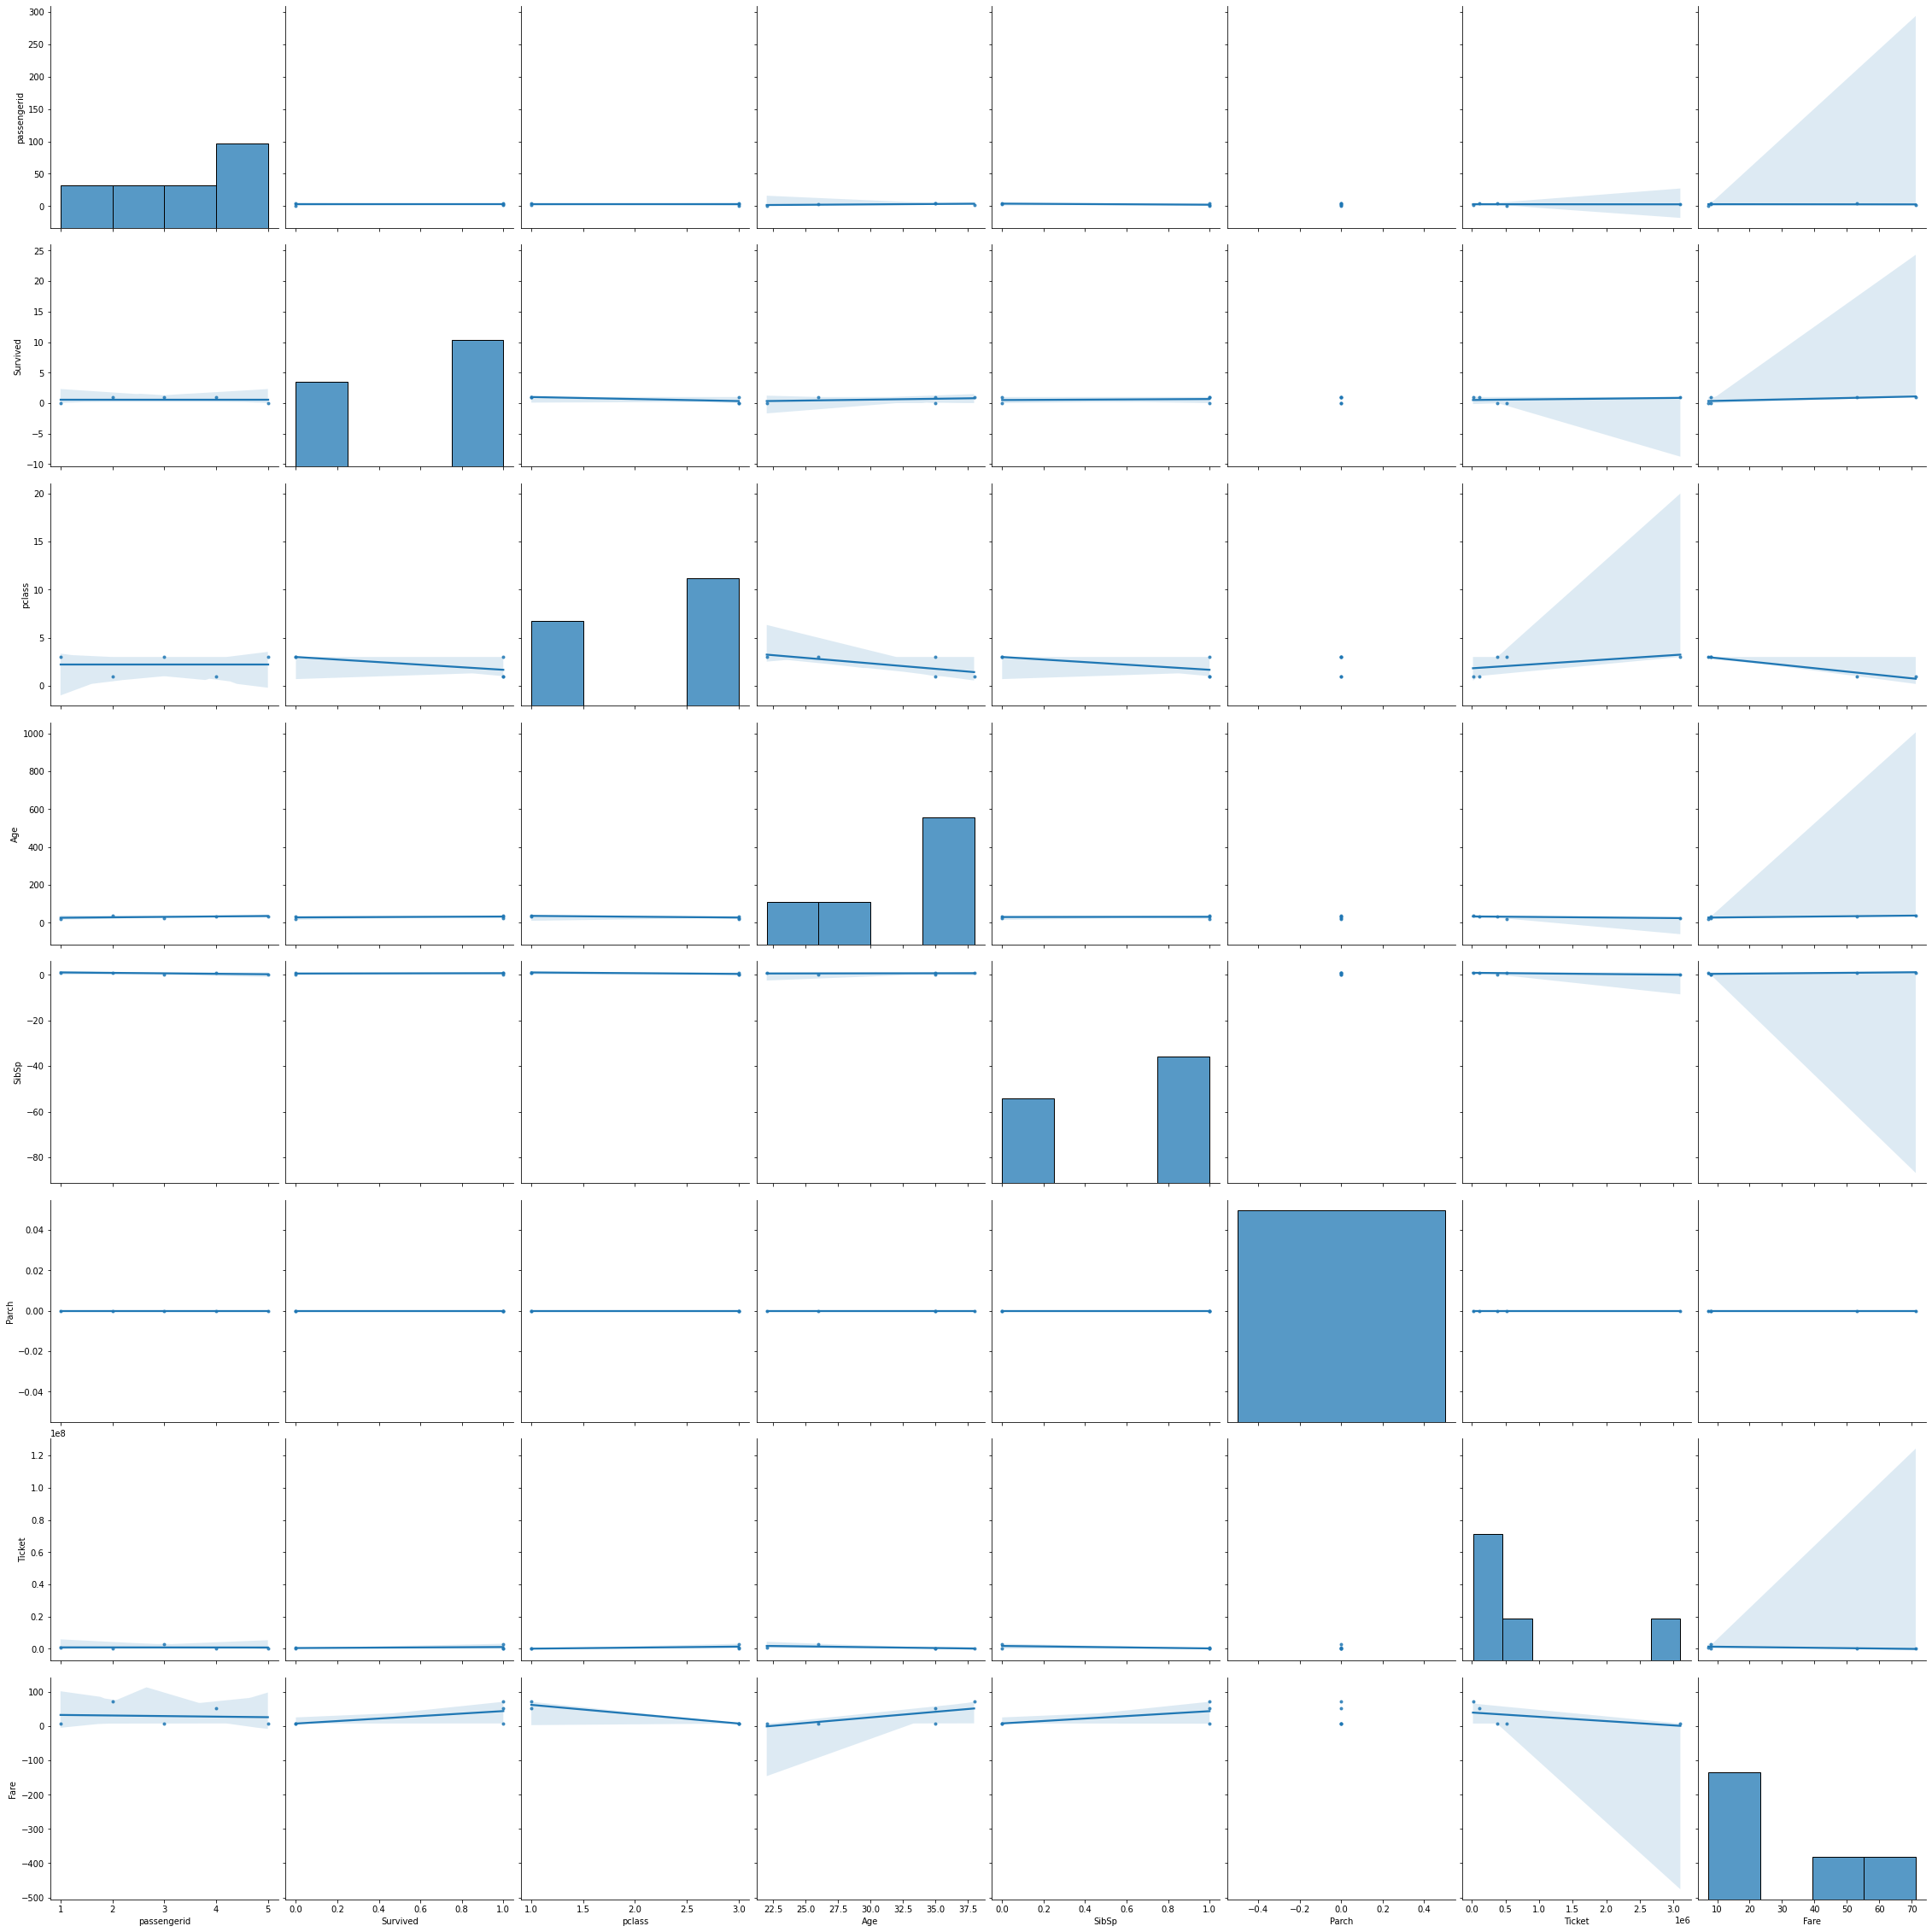

In [ ]:
df1_n=df1[['passengerid', 'Survived', 'pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
sns.pairplot(df1_n,height=4,kind="reg",markers=".")

In [ ]:
df1=df1.drop(columns=['Cabin','Name','passengerid','Ticket','SibSp'])

In [ ]:
df1.fillna(method='ffill',inplace=True)
df1.fillna(method='ffill',inplace=True)

In [ ]:
lab_enc=preprocessing.LabelEncoder()
df1['Sex']=lab_enc.fit_transform(df1['Sex'])
df1['Fare']=lab_enc.fit_transform(df1['Fare'])
df1['Embarked']=lab_enc.fit_transform(df1['Embarked'])

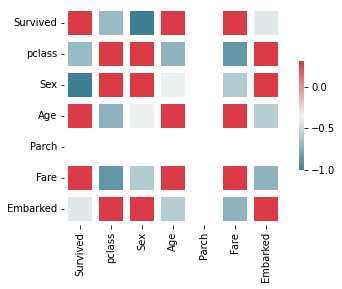

In [ ]:
corr=df1.corr()
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=cmap,vmax=.3,square=True,linewidths=6,cbar_kws={"shrink":.5})
colormap=plt.cm.viridis

In [ ]:
Y=df1['Survived']
X=df1.drop(columns=['Survived'])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [ ]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.5
